<b>Load the necessery packages</b>

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

<b>Load the internal transfers from an uploaded csv</b>

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
df = pd.read_csv('uploads/Internal_Transfer.csv',delimiter = '|')

In [7]:
#df.describe()

,FROM_CIF,TO_CIF,AMT,NUM
count,"162,498.00","162,498.00","162,498.00","162,498.00"
mean,"10,424,240.88","9,775,509.66","28,278.98",4.91
std,"15,190,670.16","16,259,293.00","497,021.39",10.87
min,1.00,1.00,"3,000.01",1.00
25%,"2,938,491.50","2,167,340.00","4,144.00",1.00
50%,"5,943,004.00","5,193,181.50","6,415.90",2.00
75%,"17,135,930.00","17,002,737.25","13,406.82",5.00
max,"86,405,532.00","86,405,532.00","92,949,672.96","1,410.00"


In [5]:
df = df[df['AMT']>10000]

In [6]:
df.shape

(52794, 4)

<b>Convert the pair in to a graph</b>

In [ ]:
G = nx.Graph()

In [ ]:
 G=nx.nx.from_pandas_edgelist(df, source = 'FROM_CIF', target = 'TO_CIF', edge_attr = ['AMT', 'NUM'],create_using = G)

<b>Find the maximumal Cliques </b>

In [ ]:
clique_list = list(nx.find_cliques(G))

<b>Conversion to a DataFrame</b>

In [ ]:
df_c=pd.DataFrame({'Clique_members':clique_list})

In [ ]:
df_c['Clique_length'] = df_c['Clique_members'].apply(len)

<b> Display the cliques of a certain number of members </b>

In [ ]:
df_c.shape

In [ ]:
pd.set_option('max_columns', None) #display all columns
#pd.reset_option(“max_columns”) #to return to default

In [ ]:
df_c[df_c['Clique_length'] ==4]

<b> Select a clique to be displayed</b>

In [ ]:
subgraph_list = df_c.iloc[1246,0]

In [ ]:
print(subgraph_list)

In [ ]:

#[f'{mem:08d}' for mem in subgraph_list ]

<b> Create a subgraph, containing only the members of the clique </b>

In [ ]:
sG = G.subgraph(nodes=subgraph_list)

<b> Display & export the picture of the subgraph</b>

In [ ]:
plt.rcParams['font.size'] = 40
fig = plt.figure(figsize = (10,10))
nx.draw(sG, with_labels = True)
fig.savefig('sg.jpg')

<b>Display the cliques that a certain cif is a member</b>

In [ ]:
df_c[df_c['Clique_members'].apply(lambda x: 1 in x)]

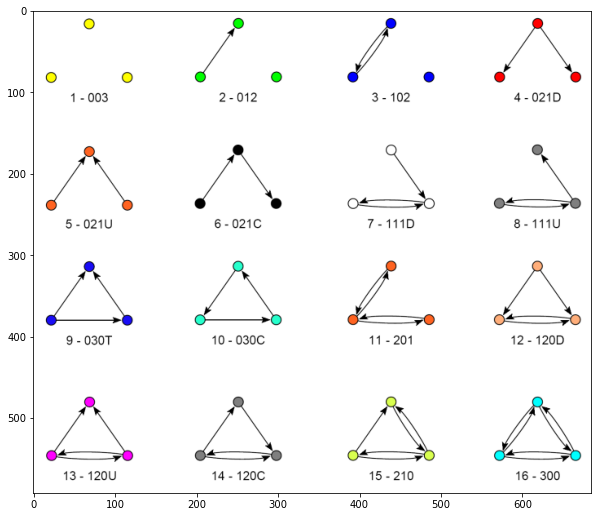

In [19]:

img = mpimg.imread('Three-node-triads-in-directed-graphs-for-undistinguishable-nodes-picture-from-21.png')
fig = plt.figure(figsize = (10,10))
imgplot = plt.imshow(img)
plt.show()

In [7]:
GD = nx.DiGraph()

In [8]:
 GD=nx.nx.from_pandas_edgelist(df, source = 'FROM_CIF', target = 'TO_CIF', edge_attr = ['AMT', 'NUM'],create_using = GD)

In [ ]:
nx.triadic_census(GD)

In [ ]:
triad_list = nx.triads_by_type(GD)

In [ ]:
sGD = GD.subgraph(nodes=subgraph_list)

In [ ]:
plt.rcParams['font.size'] = 40
fig = plt.figure(figsize = (20,20))
nx.draw(sGD, with_labels = True)
fig.savefig('sgd.jpg')